In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Load MNIST
(X_train_raw, y_train_raw), (_, _) = mnist.load_data()

# Normalize and flatten
X_train = X_train_raw.reshape(-1, 784).astype(np.float32) / 255.0

# Save raw labels separately to avoid index mismatch
y_train_original = y_train_raw.copy()

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train_raw.reshape(-1, 1))

# Network dimensions
input_size, hidden_size, output_size = 784, 128, 10

# He initialization for ReLU
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
b2 = np.zeros((1, output_size))

# Activations
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

# Loss
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# Training
epochs = 10
lr = 0.01
batch_size = 64
losses = []

for epoch in range(epochs):
    total_loss = 0

    # Shuffle a COPY of training data
    idx = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[idx]
    y_train_shuffled = y_train[idx]

    for i in range(0, X_train.shape[0], batch_size):
        x_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass
        z1 = x_batch @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        a2 = softmax(z2)

        # Loss
        loss = cross_entropy(y_batch, a2)
        total_loss += loss

        # Backward
        dz2 = a2 - y_batch
        dW2 = a1.T @ dz2 / batch_size
        db2 = np.sum(dz2, axis=0, keepdims=True) / batch_size

        dz1 = (dz2 @ W2.T) * relu_deriv(z1)
        dW1 = x_batch.T @ dz1 / batch_size
        db1 = np.sum(dz1, axis=0, keepdims=True) / batch_size

        # Update weights
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    avg_loss = total_loss / (X_train.shape[0] / batch_size)
    losses.append(avg_loss)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 0.8347
Epoch 2, Loss: 0.4111
Epoch 3, Loss: 0.3485
Epoch 4, Loss: 0.3162
Epoch 5, Loss: 0.2944
Epoch 6, Loss: 0.2773
Epoch 7, Loss: 0.2630
Epoch 8, Loss: 0.2508
Epoch 9, Loss: 0.2398
Epoch 10, Loss: 0.2301


In [ ]:
def predict(img):
    img = img.reshape(1, 784) / 255.0
    a1 = relu(img @ W1 + b1)
    a2 = softmax(a1 @ W2 + b2)
    return np.argmax(a2)

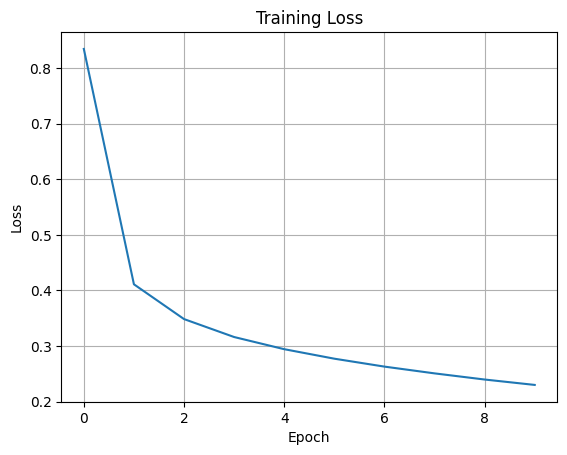

In [ ]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

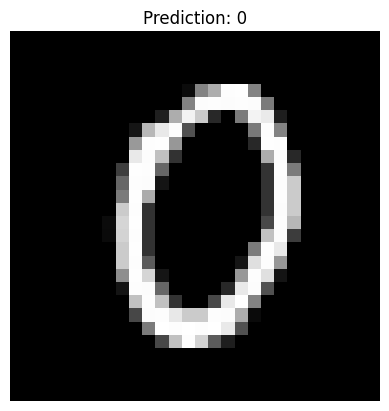

In [ ]:
# Predict a sample
def predict(img):
    img = img.reshape(1, 784).astype(np.float32) / 255.0
    a1 = relu(img @ W1 + b1)
    a2 = softmax(a1 @ W2 + b2)
    return np.argmax(a2), a2

# Choose sample
idx = np.random.randint(X_train_raw.shape[0])
pred, probs = predict(X_train_raw[idx])  # NOTE: use unshuffled version
true_label = y_train_original[idx]

# Display
plt.imshow(X_train_raw[idx], cmap='gray')
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1, Loss: 0.0272
Epoch 2, Loss: 0.0157
Epoch 3, Loss: 0.0130
Epoch 4, Loss: 0.0114
Epoch 5, Loss: 0.0102
Epoch 6, Loss: 0.0094
Epoch 7, Loss: 0.0085
Epoch 8, Loss: 0.0078
Epoch 9, Loss: 0.0072
Epoch 10, Loss: 0.0069


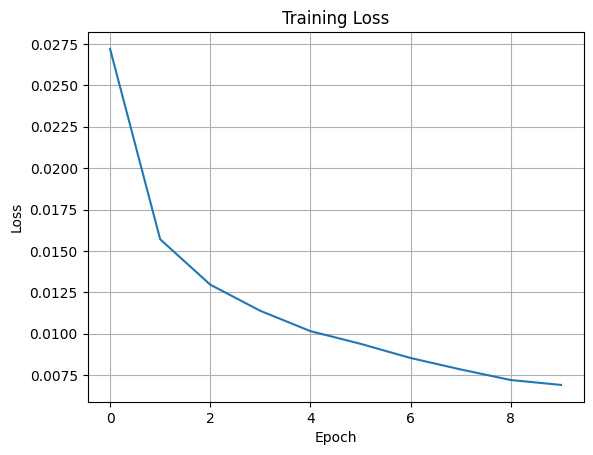

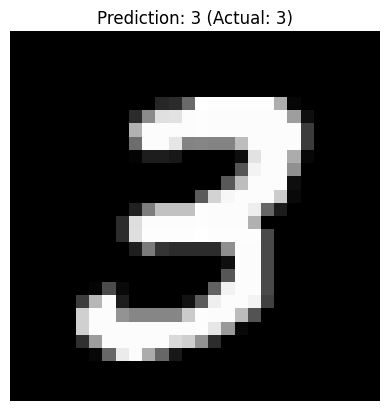

In [1]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Step 2: Load and Preprocess the Dataset
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0  # Normalize pixel values to [0,1]

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))

# Step 3: Initialize the Network
input_size, hidden_size, output_size = 784, 64, 10
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Step 4: Define Activation and Loss Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def loss_fn(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8))  # Add epsilon to avoid log(0)

# Step 5: Train the Model
epochs, lr = 10, 0.1
losses = []

for epoch in range(epochs):
    total_loss = 0
    for i in range(X_train.shape[0]):
        x = X_train[i:i+1]
        y = y_train[i:i+1]

        # Forward pass
        z1 = x @ W1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)

        # Loss
        loss = loss_fn(y, a2)
        total_loss += loss

        # Backward pass
        dz2 = a2 - y
        dW2 = a1.T @ dz2
        db2 = dz2
        dz1 = (dz2 @ W2.T) * sigmoid_deriv(a1)
        dW1 = x.T @ dz1
        db1 = dz1

        # Update weights
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    avg_loss = total_loss / X_train.shape[0]
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Step 6: Visualize Training Loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Step 7: Predict a Sample Digit with Label 3
def predict(img):
    img = img.reshape(1, 784) / 255.0
    a1 = sigmoid(img @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    return np.argmax(a2)

# Find an index where the true label is 3
label_indices = np.where(np.argmax(y_train, axis=1) == 3)[0]
idx = label_indices[0]  # Use the first occurrence of digit "3"

# Show image and prediction
plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predict(X_train[idx] * 255)} (Actual: 3)")
plt.axis('off')
plt.show()